In [ ]:
from google.colab import drive
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the preprocessed data
data_directory = '/content/drive/MyDrive/Strawberry_Disease_Processed'

train_images = np.load(f"{data_directory}/train_images.npy")
train_labels = np.load(f"{data_directory}/train_labels.npy")
test_images = np.load(f"{data_directory}/test_images.npy")
test_labels = np.load(f"{data_directory}/test_labels.npy")

print("Data Loaded:")
print(f"Train Images: {train_images.shape}, Train Labels: {train_labels.shape}")
print(f"Test Images: {test_images.shape}, Test Labels: {test_labels.shape}")


Mounted at /content/drive
Data Loaded:
Train Images: (1450, 224, 224, 3), Train Labels: (1450, 7)
Test Images: (743, 224, 224, 3), Test Labels: (743, 7)


In [ ]:
disease_labels = {
    "Angular leafspot": 0,
    "Anthracnose Fruit Rot": 1,
    "Blossom Blight": 2,
    "Gray Mold": 3,
    "Leaf Spot": 4,
    "Powdery Mildew Fruit": 5,
    "Powdery Mildew Leaf": 6
}

In [ ]:
# Define the ResNet-based model
def build_resnet_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze the base model layers to retain pretrained weights
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for fine-tuning
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add global average pooling layer
    x = Dense(256, activation='relu')(x)  # Fully connected layer
    x = Dense(128, activation='relu')(x)  # Another fully connected layer
    output = Dense(num_classes, activation='softmax')(x)  # Output layer with softmax activation

    model = Model(inputs=base_model.input, outputs=output)
    return model

# Build model
input_shape = train_images.shape[1:]  # Shape of a single image
num_classes = train_labels.shape[1]  # Number of disease categories
model = build_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,146,055 (92.11 MB)

 Trainable params: 558,343 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=25,  # Increase epochs if needed
    batch_size=32,
    verbose=1
)


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 381ms/step - accuracy: 0.3436 - loss: 1.6914 - val_accuracy: 0.4118 - val_loss: 1.6156
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.5921 - loss: 1.3422 - val_accuracy: 0.4993 - val_loss: 1.4906
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.6460 - loss: 1.1577 - val_accuracy: 0.5316 - val_loss: 1.3910
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.6904 - loss: 0.9929 - val_accuracy: 0.5491 - val_loss: 1.3600
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.7421 - loss: 0.8666 - val_accuracy: 0.5572 - val_loss: 1.3343
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.7580 - loss: 0.8192 - val_accuracy: 0.5666 - val_loss: 1.3098
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7462 - loss: 0.7930 - val_accuracy: 0.5747 - val_loss: 1.2806
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - accuracy: 0.7820 - loss: 0.6994 - val_accuracy: 

Test Accuracy: 62.72%
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       147
           1       0.73      0.31      0.43        36
           2       0.93      1.00      0.96        62
           3       0.56      0.92      0.70       145
           4       0.49      0.47      0.48       159
           5       0.22      0.12      0.15        43
           6       0.68      0.46      0.55       151

    accuracy                           0.63       743
   macro avg       0.62      0.57      0.57       743
weighted avg       0.63      0.63      0.61       743



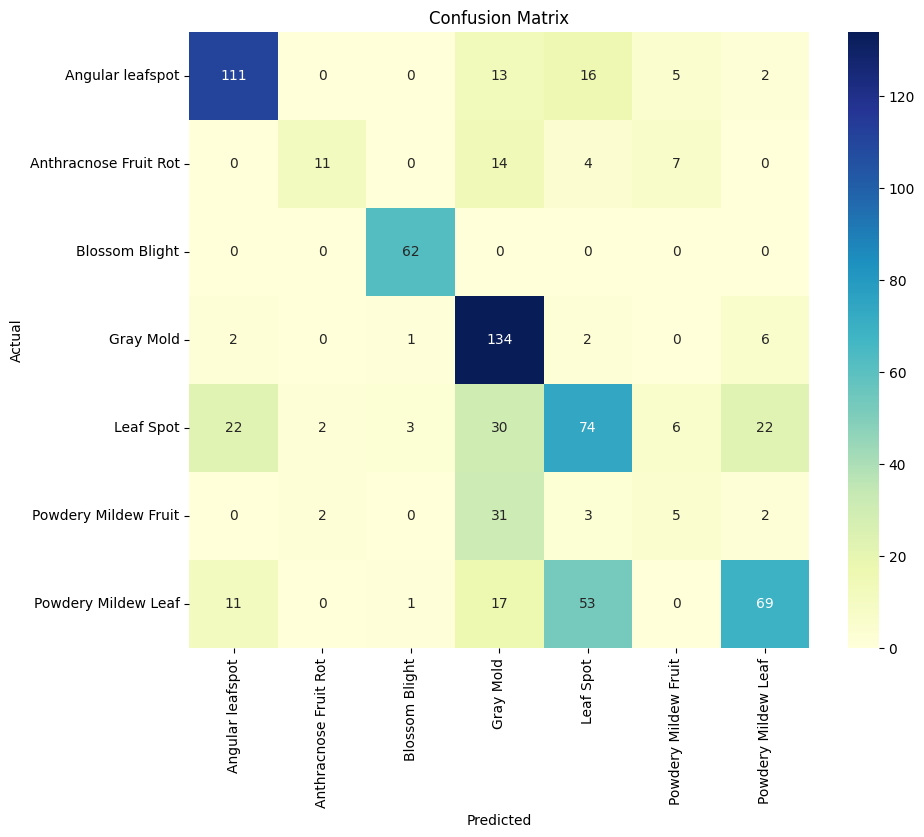

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true_classes = np.argmax(test_labels, axis=1)  # True class indices

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d', xticklabels=disease_labels.keys(), yticklabels=disease_labels.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Save the model
model.save('/content/drive/MyDrive/Strawberry_Disease_Processed/strawberry_disease_model.h5')
print("Model saved successfully.")


Model saved successfully.
